In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 61.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11080586 sha256=9e6ccdd4853c8cea4618ce34015862fe00133c7dc2a9a9b2d844a0040e9939ec
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


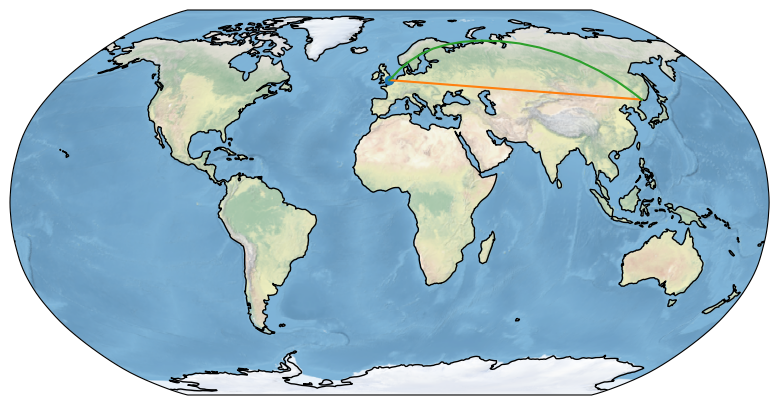

In [ ]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

plt.show()

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("matched-seawifs-8day-ncp-12-6-2012.xlsx")

df.head()

,iso,crsID,Lat,Lon,Yr,Mn,Dy,salt,temp,press,...,PIC,POC,aot,Rrs_412,Rrs_443,Rrs_490,Rrs_510,Rrs_555,Rrs_670,ID
0,733504.013526,16,-48.416184,-42.176826,2008,4,6,34.391381,11.214600,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34789
1,733504.014225,16,-48.413941,-42.179925,2008,4,6,34.393294,11.212323,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34790
2,733504.014923,16,-48.411651,-42.183057,2008,4,6,34.394968,11.219295,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34791
3,733504.015622,16,-48.409358,-42.186169,2008,4,6,34.396556,11.242221,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34792
4,733504.016321,16,-48.407114,-42.189271,2008,4,6,34.398143,11.257306,101.325,...,0.00038,80.099899,0.04115,0.00615,0.00543,0.00479,0.00372,0.0022,0.00026,34793


<Axes: >

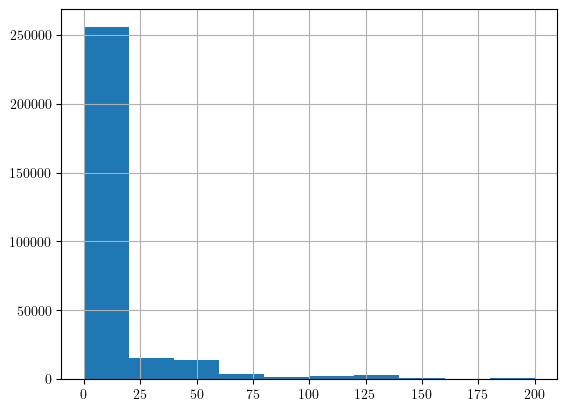

In [ ]:
df_pos = df[df['ncp'] >= 0]
df_pos = df_pos[df_pos['ncp'] <= 200]
df_neg = df[df['ncp'] <= 0]
df_neg = df_neg[df_neg['ncp'] >= -50]
df_pos['ncp'].hist()

In [ ]:
df_pos['ncp'].describe()

count    350570.000000
mean          9.507173
std          23.494773
min         -49.999608
25%           2.668655
50%           5.803577
75%          10.958500
max         199.964750
Name: ncp, dtype: float64

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [ ]:
df_all = df[df['ncp'] >= -55]
df_all = df_all[df_all['ncp'] <= 205]

a = 3
samples = 510
smp = [0] + sorted(np.random.power(a, samples)) + [1]

colors1 = plt.cm.binary(np.linspace(1, 0, 128))

colors2 = plt.cm.jet(smp)

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

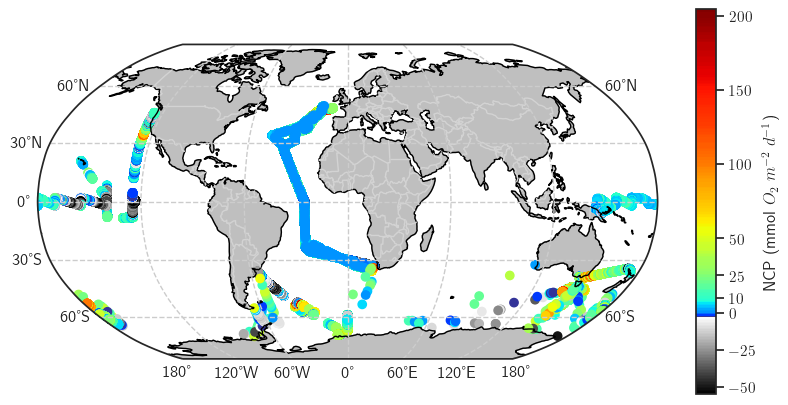

In [ ]:
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import seaborn as sns

plt.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color="grey", alpha=0.5)
ax.add_feature(cfeature.BORDERS, edgecolor="lightgrey")

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ncp_map = plt.scatter(x = df_all['Lon'], y = df_all['Lat'], c = df_all['ncp'],
                      cmap=mymap, transform = ccrs.PlateCarree())

cbar = plt.colorbar(ncp_map, ticks = [-50, -25, 0, 10, 25, 50, 100, 150, 200])

cbar.set_label(r'NCP (mmol $O_2$ $m^{-2}$ $d^{-1}$)', rotation=90)

plt.savefig('ncp_map.png')
plt.show()

[]

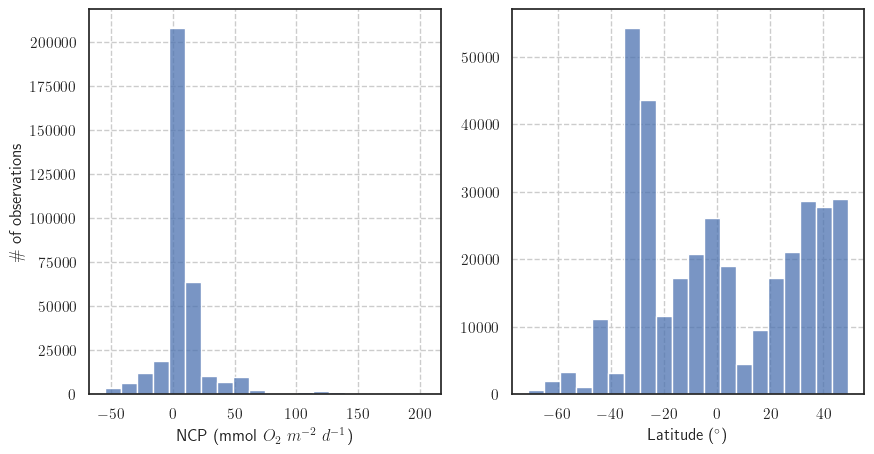

In [ ]:
sns.set_theme(style="white")

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)

sns.histplot(df_all['ncp'], bins = 20)
plt.xlabel(r'NCP (mmol $O_2$ $m^{-2}$ $d^{-1}$)')
plt.ylabel('\# of observations')
plt.grid(linestyle='--')

ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df_all['Lat'], bins = 20)
plt.xlabel(r'Latitude ($^\circ$)')
plt.ylabel('')
plt.grid(linestyle='--')

plt.savefig('ncp_hist.png')
plt.plot()